<a href="https://colab.research.google.com/github/dla9944/Video_Game_21c/blob/main/Video_games_Standard_scale_LightGBM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# global_sales의 예측을 목표로, 다른 변수들의 중요도를 확인합니다


<br>


### train모델은 GBM계열의 Classifier 알고리즘으로 학습할 예정입니다

### 정규화는 min-max scaler를 사용합니다.

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# 필요한 라이브러리 호출

# 기초
import numpy as np
import pandas as pd
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from plotly import express as px

# 사이킷런 분류
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# 스케일링
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


# 지도학습

# 회귀 종류
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb


# 분류 종류
import xgboost as xgb # 추후 변경
import lightgbm as lgb # 추후 변경
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


# 비지도학습
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 평가용
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# 필요한 테스트 호출

df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.info() # 더미데이터를 만들 object들 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
# Name 열은 삭제예정
# 결측치 확인
df.isnull().mean()
# df.isnull().sum() # Year, Publisher 확인

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.016327
Genre           0.000000
Publisher       0.003494
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [ ]:
# Name, Rank는 삭제
df2 = df.copy()
df = df.drop(['Name','Rank'], axis = 1)

In [ ]:
df

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16593,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# 결측치 처리 고려
df.Year.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Name: Year, Length: 16598, dtype: bool

In [ ]:
df.Global_Sales.sort_values(ascending = False).head(20)

0     82.74
1     40.24
2     35.82
3     33.00
4     31.37
5     30.26
6     30.01
7     29.02
8     28.62
9     28.31
10    24.76
11    23.42
12    23.10
13    22.72
14    22.00
15    21.82
16    21.40
17    20.81
18    20.61
19    20.22
Name: Global_Sales, dtype: float64

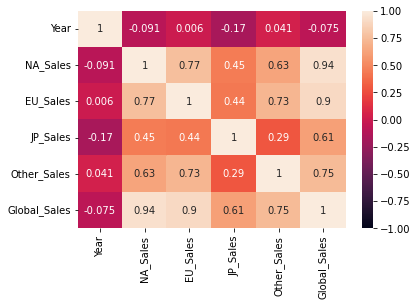

In [ ]:
sns.heatmap(df.corr(), annot=True, vmax = 1, vmin=-1)

In [ ]:
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [ ]:
# 게임 발매일(Year)를 최빈값이나 평균값, 특정한 값으로 하는 것은
# 현실성이 없는 것으로 보임. dropna로 삭제
subset = ['year']

df = df.dropna(subset=['Year'])
df

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16593,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# Publisher 결측치 고려
df.isna().sum()

Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [ ]:
df.Publisher.value_counts() # 최빈값으로 채우기로 함

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

In [ ]:
# Electronic Arts로 fill

df.Publisher = df.Publisher.fillna('Electronic Arts')
df.isnull().mean()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Platform        0.0
Year            0.0
Genre           0.0
Publisher       0.0
NA_Sales        0.0
EU_Sales        0.0
JP_Sales        0.0
Other_Sales     0.0
Global_Sales    0.0
dtype: float64

In [ ]:
df3 = df.copy()
df3.tail(2)

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16596,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
df = df.astype({'Global_Sales': 'int'})

In [ ]:
# # 더미데이터 제작
# 두번째 세팅 시 , Publisher value가 너무 다양함
columns = ['Platform', 'Genre']

df = pd.get_dummies(df, columns = columns, drop_first = True)
df

,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,2006.0,Nintendo,41.49,29.02,3.77,8.46,82,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1985.0,Nintendo,29.08,3.58,6.81,0.77,40,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2008.0,Nintendo,15.85,12.88,3.79,3.31,35,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2009.0,Nintendo,15.75,11.01,3.28,2.96,33,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1996.0,Nintendo,11.27,8.89,10.22,1.00,31,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,2002.0,Kemco,0.01,0.00,0.00,0.00,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16594,2003.0,Infogrames,0.01,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16595,2008.0,Activision,0.00,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16596,2010.0,7G//AMES,0.00,0.01,0.00,0.00,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# 전처리 종료
# 훈련셋, 시험셋 분리

# 과다한 시간 소요로 인해 Publisher는 삭제함
X = df.drop(['Global_Sales', 'Publisher'], axis = 1)
y = df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=
                                                   0.2, random_state=10)

In [ ]:
X

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,2006.0,41.49,29.02,3.77,8.46,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1985.0,29.08,3.58,6.81,0.77,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2008.0,15.85,12.88,3.79,3.31,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2009.0,15.75,11.01,3.28,2.96,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1996.0,11.27,8.89,10.22,1.00,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,2002.0,0.01,0.00,0.00,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16594,2003.0,0.01,0.00,0.00,0.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16595,2008.0,0.00,0.00,0.00,0.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16596,2010.0,0.00,0.01,0.00,0.00,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
y

0        82
1        40
2        35
3        33
4        31
         ..
16593     0
16594     0
16595     0
16596     0
16597     0
Name: Global_Sales, Length: 16327, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
# 표준화 스케일링 시작

st_scaler = StandardScaler()
X_trainst = st_scaler.fit_transform(X_train)
X_testst = st_scaler.fit_transform(X_test)


In [ ]:
# LightGBM 분류기 정의
model = lgb.LGBMClassifier(random_state = 100)

model

LGBMClassifier(random_state=100)

In [ ]:
# lightgbm 학습 시작
model.fit(X_trainst, y_train)
pred = model.predict(X_test)

In [ ]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# 정확도 점수 계산
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred) # 88점

0.8842620943049602

In [ ]:
proba = model.predict_proba(X_testst)
proba

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# 변수 중요도 확인

feature_important = pd.DataFrame({
    'features' : X_train.columns,
    'values' : model.feature_importances_,
})
feature_important

,features,values
0,Year,3757
1,NA_Sales,11026
2,EU_Sales,8942
3,JP_Sales,6088
4,Other_Sales,4811
5,Platform_3DO,0
6,Platform_3DS,157
7,Platform_DC,2
8,Platform_DS,382
9,Platform_GB,109


In [ ]:
feature_important.sort_values(by = 'values', ascending=False)

,features,values
1,NA_Sales,11026
2,EU_Sales,8942
3,JP_Sales,6088
4,Other_Sales,4811
0,Year,3757
44,Genre_Sports,440
8,Platform_DS,382
41,Genre_Role-Playing,297
43,Genre_Simulation,234
23,Platform_PSP,208


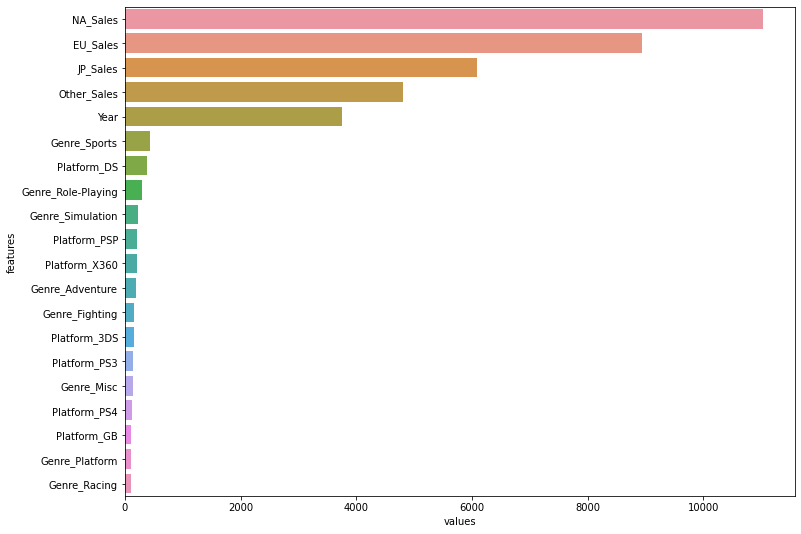

In [ ]:
plt.figure(figsize=(12,9))
sns.barplot(x='values', y='features', data = feature_important.sort_values(by = 'values', ascending=False).head())

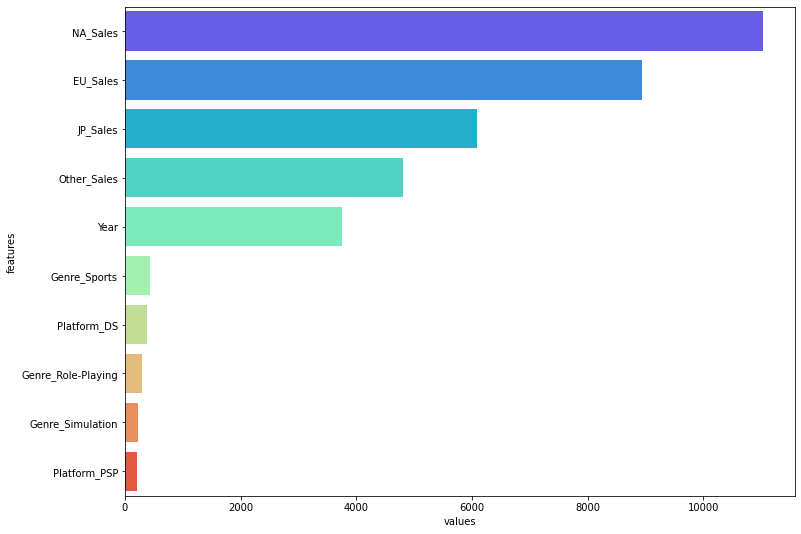

In [ ]:
plt.figure(figsize=(12,9))
sns.barplot(x='values', y='features', data = feature_important.sort_values(by = 'values', ascending=False).head(10), palette = 'rainbow')